In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io
from skimage.filters import gaussian, median
from skimage import filters
from skimage import exposure
from skimage import feature
from skimage.morphology import disk
from scipy.stats import kurtosis
from skimage.restoration import denoise_bilateral
from scipy.ndimage import uniform_filter
from glob import glob
import os
import matplotlib
import matplotlib.patches as patches

matplotlib.rcParams.update({'errorbar.capsize': 4})


In [3]:
path = '/Users/pabloherrero/Library/CloudStorage/GoogleDrive-qmlab@mail.huji.ac.il/My Drive/Ba Tagging/code/imag_analisis/focustest/focustest_100um/Im_pos*.tif'
files = glob(path)
files.sort()
files


['/Users/pabloherrero/Library/CloudStorage/GoogleDrive-qmlab@mail.huji.ac.il/My Drive/Ba Tagging/code/imag_analisis/focustest/focustest_100um/Im_pos0.tif',
 '/Users/pabloherrero/Library/CloudStorage/GoogleDrive-qmlab@mail.huji.ac.il/My Drive/Ba Tagging/code/imag_analisis/focustest/focustest_100um/Im_pos1.tif',
 '/Users/pabloherrero/Library/CloudStorage/GoogleDrive-qmlab@mail.huji.ac.il/My Drive/Ba Tagging/code/imag_analisis/focustest/focustest_100um/Im_pos2.tif',
 '/Users/pabloherrero/Library/CloudStorage/GoogleDrive-qmlab@mail.huji.ac.il/My Drive/Ba Tagging/code/imag_analisis/focustest/focustest_100um/Im_pos3.tif',
 '/Users/pabloherrero/Library/CloudStorage/GoogleDrive-qmlab@mail.huji.ac.il/My Drive/Ba Tagging/code/imag_analisis/focustest/focustest_100um/Im_pos4.tif',
 '/Users/pabloherrero/Library/CloudStorage/GoogleDrive-qmlab@mail.huji.ac.il/My Drive/Ba Tagging/code/imag_analisis/focustest/focustest_100um/Im_pos5.tif',
 '/Users/pabloherrero/Library/CloudStorage/GoogleDrive-qmlab@mai

In [4]:
# fig, ax = plt.subplots(len(files), figsize=(10, 10*len(files)))

totint = []
avgint = []
kurt = []
for i in range(len(files)):
    img = io.imread(files[i]).astype(np.int64)
    k = kurtosis(img.flatten(), fisher=True, bias=False )
    avgim = np.average(img)
    avgint.append(avgim)
    kurt.append(k)#/avgim)
    # ax[i].imshow(img, clim=(100, 500))
    totint.append(img.sum())
    # plt.colorbar(img)

[Text(0.5, 0, 'Step (100 µm)'), Text(0, 0.5, 'Average int. (arb. units)')]

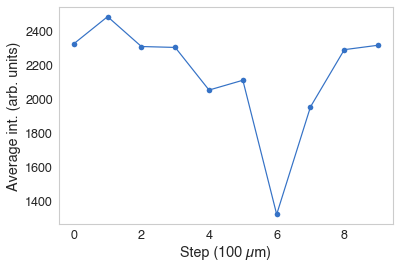

In [6]:
# plt.plot(avgint, 'ro-', label='Average int.')
plt.plot(kurt, 'bo-', label='Metric')

plt.gca().set(xlabel = 'Step (100 µm)', ylabel= 'Average int. (arb. units)')

In [10]:
np.argmin(kurt)

6

# White light, new holder NA 0.95

In [11]:
# fig, ax = plt.subplots(len(files), figsize=(10, 10*len(files)))
path = '/Users/pabloherrero/Library/CloudStorage/GoogleDrive-qmlab@mail.huji.ac.il/My Drive/Ba Tagging/code/imag_analisis/focustest/0.01mm, whitelight_attempt1/Im_pos*.tif'
files = glob(path)
files.sort()

totint = []
avgint = []
kurt = []
for i in range(len(files)):
    img = io.imread(files[i]).astype(np.int64)
    k = kurtosis(img.flatten(), fisher=True, bias=False )
    avgim = np.average(img)
    avgint.append(avgim)
    kurt.append(k)#/avgim)
    totint.append(img.sum())

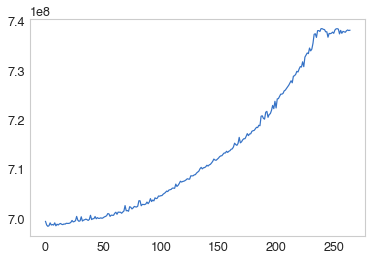

In [12]:
plt.plot(totint)

In [4]:
noise = np.random.normal(size=int(1e4))
noise=pd.DataFrame(noise)
first_derivative=noise.diff(periods=40)

In [9]:
noise.shape, first_derivative.shape

((10000, 1), (10000, 1))

# Extract features in image

In [5]:
from scipy.ndimage import median_filter

In [42]:
from sklearn.decomposition import NMF

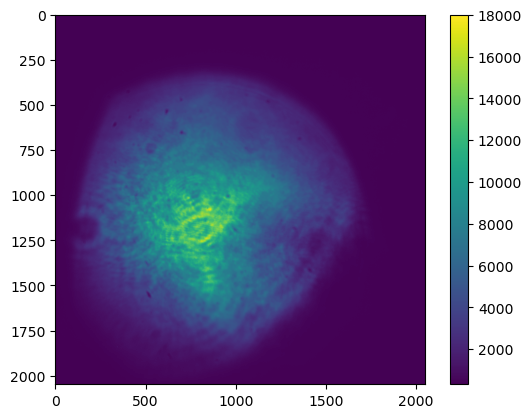

In [6]:
path = '/Users/pabloherrero/Library/CloudStorage/GoogleDrive-qmlab@mail.huji.ac.il/My Drive/Ba Tagging/data/img/sets/07-10-24/Rhodamine-B 50 µM/1/Center-561nm_Width-21nm_14-51-42.tif'

files = glob(path+'/*.tif')
files.sort()
# for n,f in enumerate(files):
    # img = io.imread(f).astype(np.int64)
img = io.imread(path).astype(np.int64)

imgb = median_filter(img, size=2)
plt.imshow(imgb,)# clim=(100, 2e4))
plt.colorbar()


In [44]:
model = NMF(n_components=20)
features = model.fit_transform(imgb)

In [51]:
def show_as_image(sample):
    bitmap = sample.reshape((2048, 2048))
    plt.figure()
    plt.imshow(bitmap, cmap='gray', interpolation='nearest')
    plt.colorbar()
    plt.show()

In [54]:
features[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00099376, 0.01124407, 0.        ,
       0.00048758, 0.        , 0.        , 0.        , 0.0809469 ])

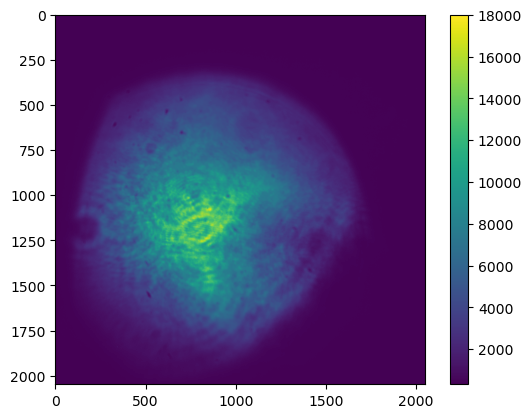

In [52]:
plt.imshow(imgb,)# clim=(100, 2e4))
plt.colorbar()

# for f in features:
    # show_as_image(f)

# New attempt

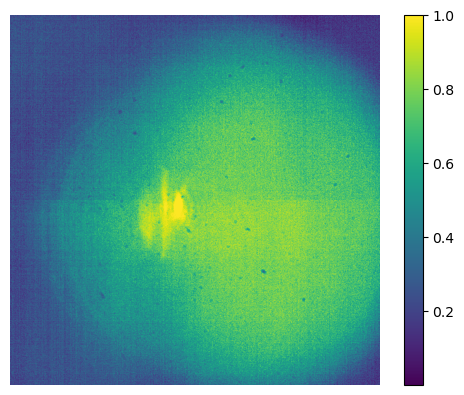

In [49]:
pimg1 = '/Users/pabloherrero/Library/CloudStorage/GoogleDrive-qmlab@mail.huji.ac.il/My Drive/Ba Tagging/code/imag_analisis/focustest/focustests_Mitutoyo/100um_50steps/Im_pos20900.0um.tif'
img1 = io.imread(pimg1).astype(np.int16)
eqim1 = exposure.equalize_hist(img1)
plt.imshow(eqim1)
plt.axis('off')
plt.colorbar()

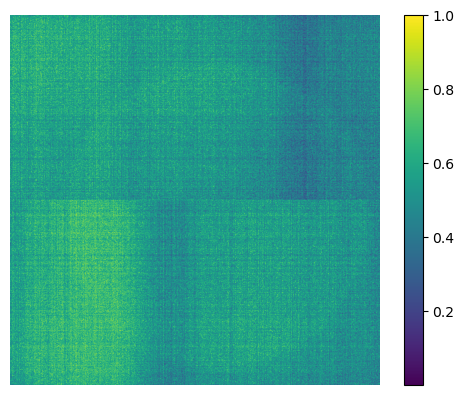

In [70]:
pimg2 = '/Users/pabloherrero/Library/CloudStorage/GoogleDrive-qmlab@mail.huji.ac.il/My Drive/Ba Tagging/code/imag_analisis/focustest/focustests_Mitutoyo/100um_50steps/Im_pos18400.0um.tif'
img2 = io.imread(pimg2).astype(np.int16)
eqim2 = exposure.equalize_hist(img2)

plt.imshow(eqim2)
plt.axis('off')
plt.colorbar()

In [82]:
# Focus measure functions
def variance_of_laplacian(image):
    return np.var(filters.laplace(image))

def sobel_focus(image):
    return np.sum(filters.sobel(image))

def tenengrad(image):
    return np.sum(filters.sobel(image)**2)

def laplacian(image):
    return np.sum(filters.laplace(image)**2)

def canny_sum(image):
    return np.sum(feature.canny(image, sigma=1))

def canny2(image):
    return np.sum(feature.canny(image)**2)

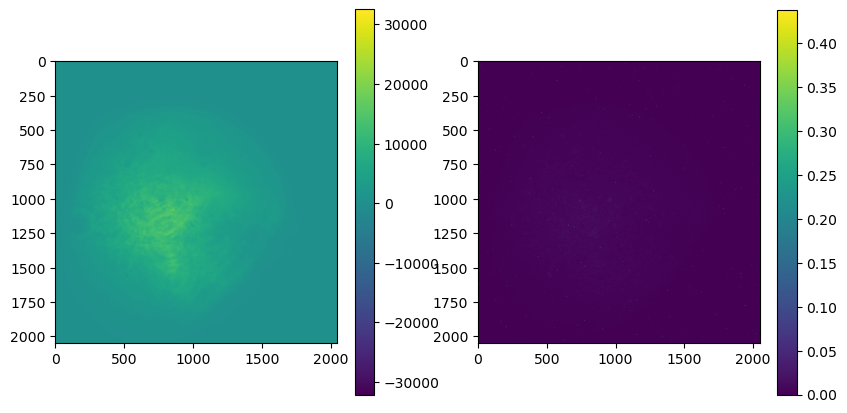

In [ ]:
sobel = filters.sobel(imgb)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))    
subp = ax[0].imshow(imgb)
subp2 = ax[1].imshow(sobel)
plt.colorbar(subp2, ax=ax[1])
plt.colorbar(subp, ax=ax[0])


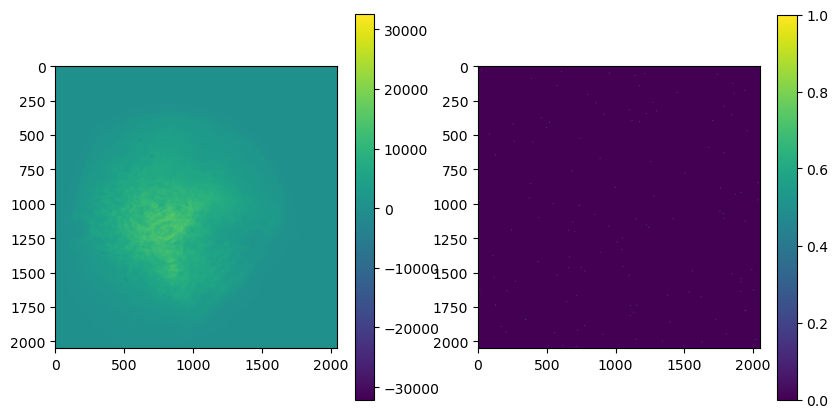

In [85]:
cannyim = feature.canny(imgb)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))    
subp = ax[0].imshow(imgb)
subp2 = ax[1].imshow(cannyim)
plt.colorbar(subp2, ax=ax[1])
plt.colorbar(subp, ax=ax[0])


## Benchmark denoising , filters 

In [8]:
path = '/Users/pabloherrero/Library/CloudStorage/GoogleDrive-qmlab@mail.huji.ac.il/My Drive/Ba Tagging/data/img/sets/07-10-24/Rhodamine-B 50 µM/1/Center-561nm_Width-21nm_14-51-42.tif'
imgb = io.imread(path).astype(np.int16)

### Equalization

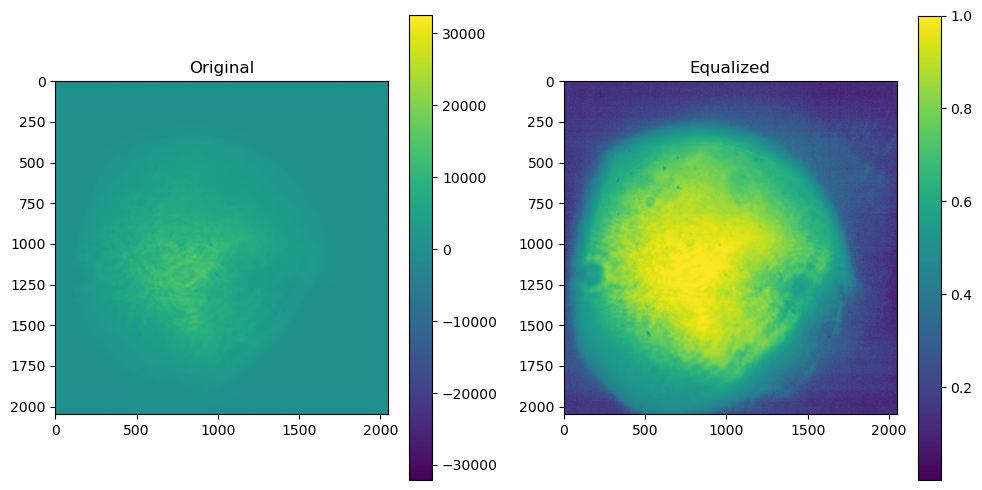

In [11]:
im_eq = exposure.equalize_hist(imgb)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))    
subp = ax[0].imshow(imgb)
subp2 = ax[1].imshow(im_eq)
ax[0].set(title='Original')
ax[1].set(title='Equalized')
plt.colorbar(subp2, ax=ax[1])
plt.colorbar(subp, ax=ax[0])
fig.tight_layout()

### High pass filters

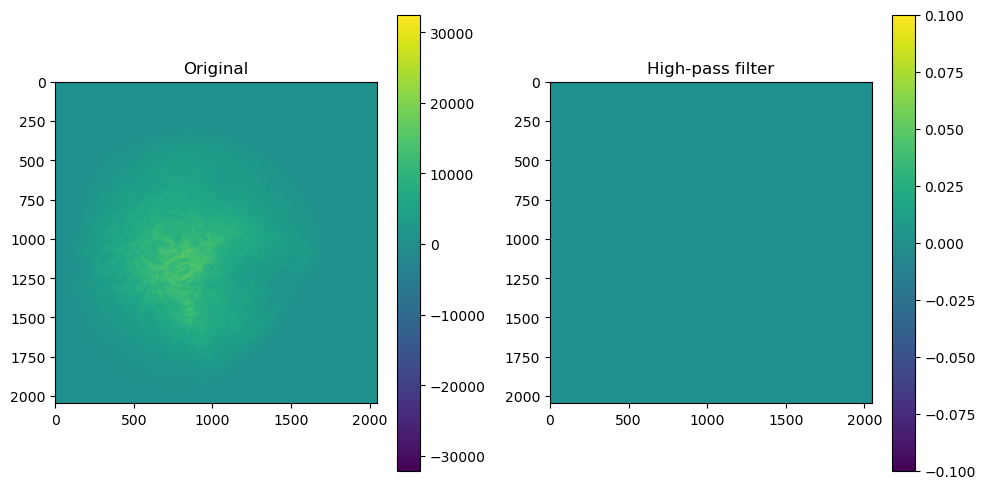

In [12]:
high_pass = imgb - uniform_filter(imgb, size=1)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))    
subp = ax[0].imshow(imgb)
subp2 = ax[1].imshow(high_pass)
ax[0].set(title='Original')
ax[1].set(title='High-pass filter')
plt.colorbar(subp2, ax=ax[1])
plt.colorbar(subp, ax=ax[0])
fig.tight_layout()

### Gaussian filter

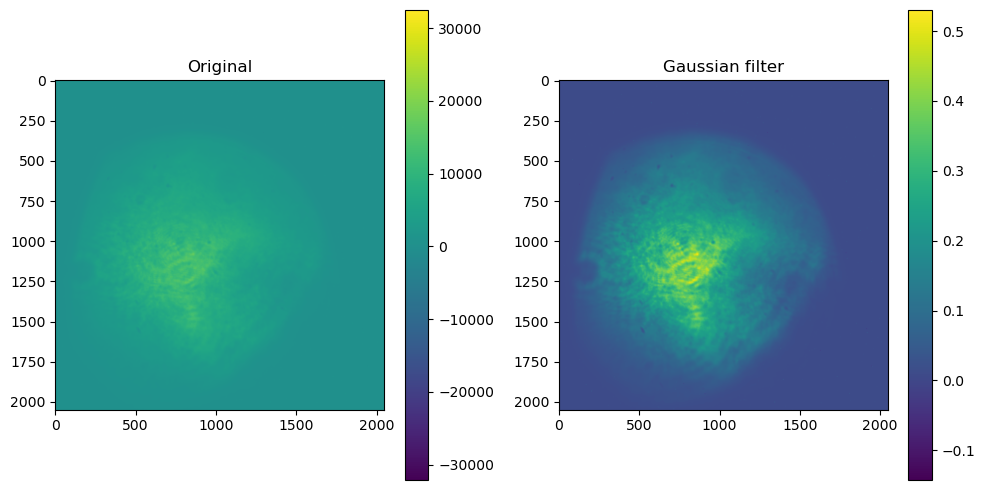

In [13]:
gaus_filt = gaussian(imgb, sigma=1)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))    
subp = ax[0].imshow(imgb)
subp2 = ax[1].imshow(gaus_filt)
ax[0].set(title='Original')
ax[1].set(title='Gaussian filter')
plt.colorbar(subp2, ax=ax[1])
plt.colorbar(subp, ax=ax[0])
fig.tight_layout()

### Median filter

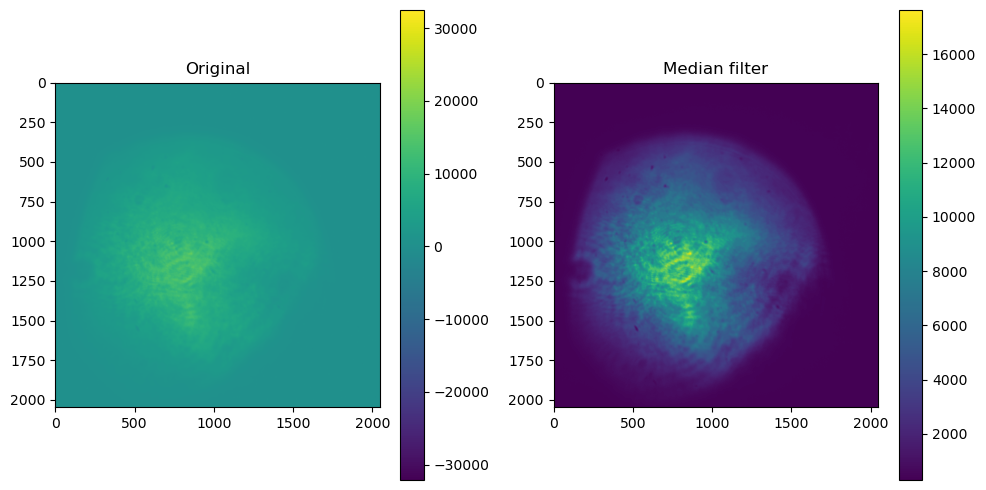

In [16]:
median_filt = median(imgb, disk(1))

fig, ax = plt.subplots(1, 2, figsize=(10, 5))    
subp = ax[0].imshow(imgb)
subp2 = ax[1].imshow(median_filt)
ax[0].set(title='Original')
ax[1].set(title='Median filter')
plt.colorbar(subp2, ax=ax[1])
plt.colorbar(subp, ax=ax[0])
fig.tight_layout()

### Biharmonic denoising

/Users/pabloherrero/Library/Python/3.9/lib/python/site-packages/skimage/restoration/_denoise.py:259: RuntimeWarning: overflow encountered in scalar subtract
  max_value -= min_value


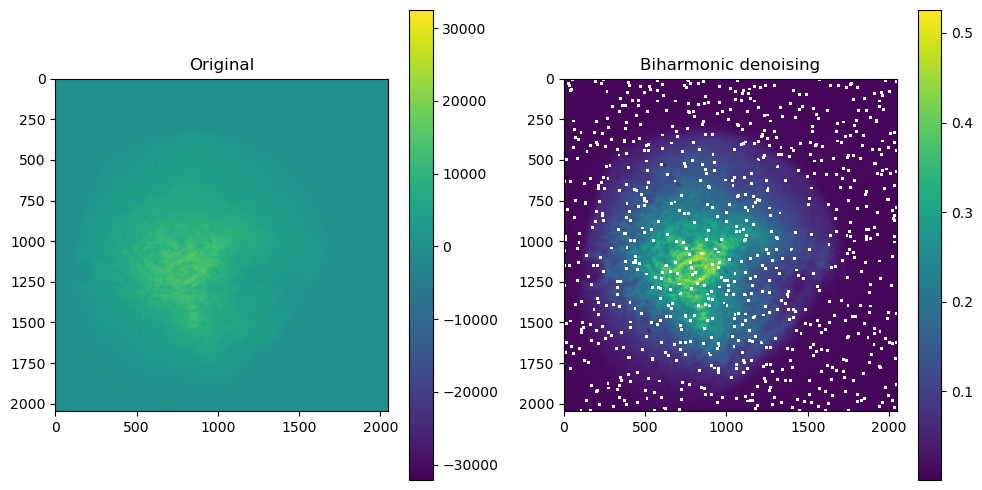

In [17]:
denoised = denoise_bilateral(imgb)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))    
subp = ax[0].imshow(imgb)
subp2 = ax[1].imshow(denoised)
ax[0].set(title='Original')
ax[1].set(title='Biharmonic denoising')
plt.colorbar(subp2, ax=ax[1])
plt.colorbar(subp, ax=ax[0])
fig.tight_layout()

## Algorithm attempt

In [28]:
pathfoc = '/Users/pabloherrero/Library/CloudStorage/GoogleDrive-qmlab@mail.huji.ac.il/My Drive/Ba Tagging/code/imag_analisis/focustest/focustests_Mitutoyo/100um_50steps/*.tif'
files = glob(pathfoc)
files.sort()

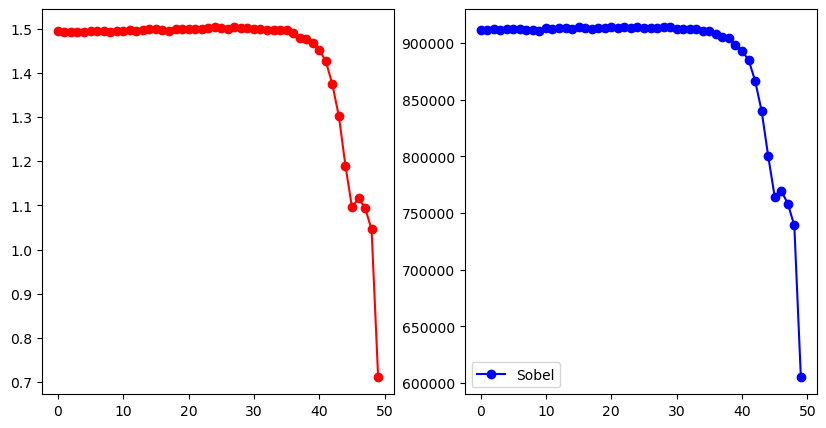

In [29]:
varlap = []
sobel = []
for f in files:
    img = io.imread(f).astype(np.int16)
    eqim = exposure.equalize_hist(img)
    varlap.append(variance_of_laplacian(eqim))
    sobel.append(sobel_focus(eqim))

fig, ax = plt.subplots(1, 2, figsize=(10, 5))    
ax[0].plot(varlap, 'ro-', label='Variance of Laplacian')
ax[1].plot(sobel, 'bo-', label='Sobel')
plt.legend()

# Try again with whitelight images

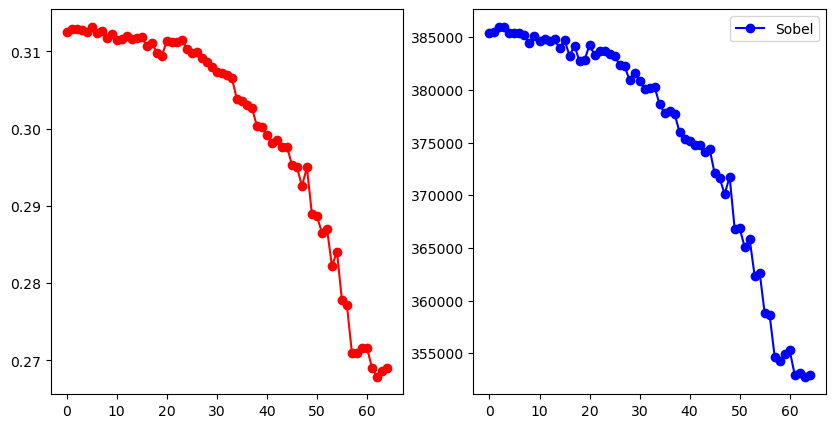

In [10]:
path = '/Users/pabloherrero/Library/CloudStorage/GoogleDrive-qmlab@mail.huji.ac.il/My Drive/Ba Tagging/code/imag_analisis/focustest/0.01mm, whitelight_attempt1/Im_pos*.tif'
files = glob(path)[200:]
files.sort()

varlap = []
sobel = []
for f in files:
    img = io.imread(f).astype(np.int16)
    eqim = exposure.equalize_hist(img)
    varlap.append(variance_of_laplacian(eqim))
    sobel.append(sobel_focus(eqim))

fig, ax = plt.subplots(1, 2, figsize=(10, 5))    
ax[0].plot(varlap, 'ro-', label='Variance of Laplacian')
ax[1].plot(sobel, 'bo-', label='Sobel')
plt.legend()

In [79]:
files[np.argmin(varlap)]

'/Users/pabloherrero/Library/CloudStorage/GoogleDrive-qmlab@mail.huji.ac.il/My Drive/Ba Tagging/code/imag_analisis/focustest/0.01mm, whitelight_attempt1/Im_pos20570.0um.tif'

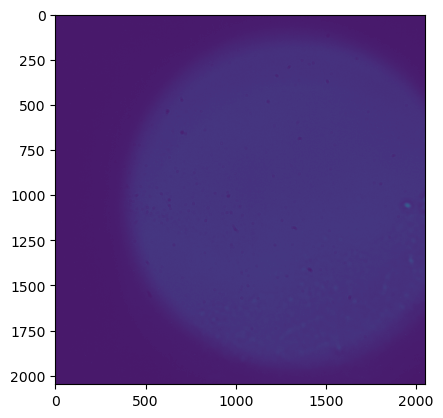

In [67]:
path = '/Users/pabloherrero/Library/CloudStorage/GoogleDrive-qmlab@mail.huji.ac.il/My Drive/Ba Tagging/code/imag_analisis/focustest/0.01mm, whitelight_attempt1/Im_pos*.tif'
files = glob(path)
files.sort()
# img = io.imread(files[np.argmin(varlap)]).astype(np.int16)

img = io.imread(files[np.argmin(varlap)]).astype(np.int16)
plt.imshow(img)

## Detect fov

In [23]:
def find_fov(gray_image):
    from skimage import io, color, filters, morphology, measure

    # Apply thresholding to create a binary mask
    threshold = filters.threshold_otsu(gray_image)
    print('Threshold otsu: ', threshold)
    binary_mask = gray_image > threshold

    # Perform morphological closing to fill small gaps
    binary_mask = morphology.closing(binary_mask, morphology.disk(10))

    # Label connected components
    labeled_mask = measure.label(binary_mask)

    # Measure properties of labeled regions
    regions = measure.regionprops(labeled_mask)

    # Find the largest circular region based on area and solidity
    best_region = None
    best_circularity = 0

    for region in regions:
        area = region.area
        perimeter = region.perimeter if region.perimeter > 0 else 1
        circularity = 4 * np.pi * (area / (perimeter ** 2))
        
        if circularity > best_circularity and area > 1000:  # Ignore small noise
            best_circularity = circularity
            best_region = region
            best_area = area


    # Create a mask for the detected FOV
    fov_mask = np.zeros_like(binary_mask, dtype=bool)

    if best_region:
        fov_mask[labeled_mask == best_region.label] = True
    return fov_mask, best_area, best_region

168


Text(0.5, 1.0, 'Detected Field of View')

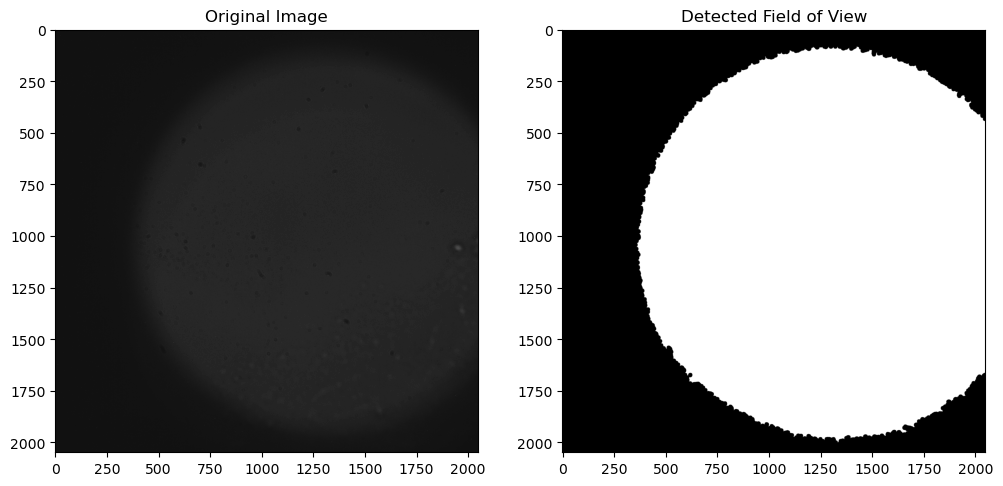

In [92]:
imgfoc = files[np.argmin(varlap)]
img = io.imread(imgfoc).astype(np.int16)
fov, area = find_fov(img)

# Display results
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(img, cmap='gray')
ax[0].set_title("Original Image")
ax[1].imshow(fov, cmap='gray')
ax[1].set_title("Detected Field of View")

# Attempt complete algorithm
1. Get the mask from the first image

2. Loop over files and calculate sobel metric

3. Use different filters to optimize the sobel metric range

In [12]:
path = '/Users/pabloherrero/Library/CloudStorage/GoogleDrive-qmlab@mail.huji.ac.il/My Drive/Ba Tagging/code/imag_analisis/focustest/0.01mm, whitelight_attempt1/Im_pos*.tif'
files = glob(path)[200:]
files.sort()

Threshold otsu:  159


Text(0.5, 1.0, 'Detected Field of View')

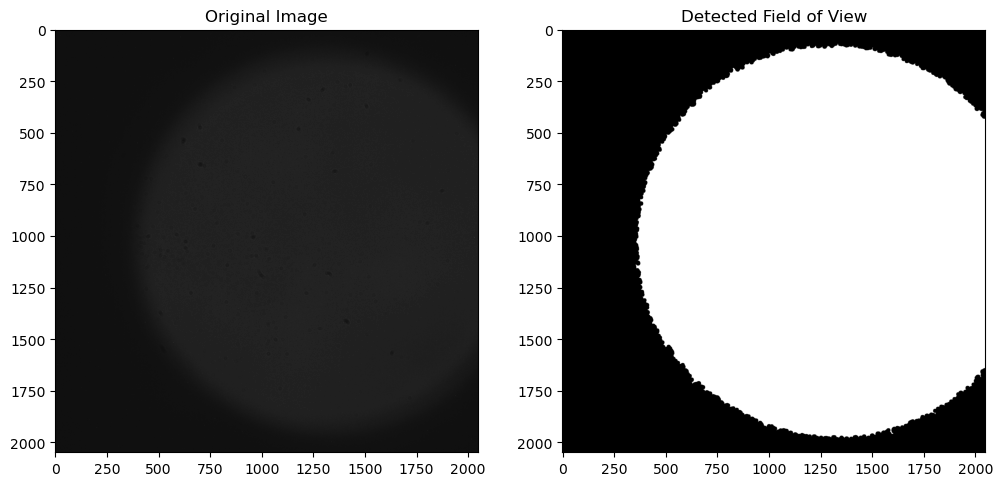

In [26]:
imgfoc = files[0]
img = io.imread(imgfoc).astype(np.int16)
fov, best_area, best_region = find_fov(img)

# Display results
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(img, cmap='gray')
ax[0].set_title("Original Image")
ax[1].imshow(fov, cmap='gray')
ax[1].set_title("Detected Field of View")

In [24]:
def offset_circular_mask(img, best_region, best_area, flag_plot = True):
    # Extract the centroid (regionprops returns (row, col))
    center_y, center_x = best_region.centroid  

    # Use the known or calculated radius, e.g. from area = πr²:
    # radius ≈ sqrt(area / π). If your area is ~2,625,898:
    fixed_radius = int(np.sqrt(best_area / np.pi))

    # Create a coordinate grid
    height, width = img.shape
    Y, X = np.ogrid[:height, :width]

    # Build the circular mask. This will be True inside the circle.
    circular_mask = (X - center_x)**2 + (Y - center_y)**2 <= fixed_radius**2
    # Display the mask
    if flag_plot:
        plt.figure(figsize=(8, 6))
        plt.imshow(circular_mask, cmap='gray')
        plt.title("Offset Circular Mask (Partially Outside Image)")
    return circular_mask


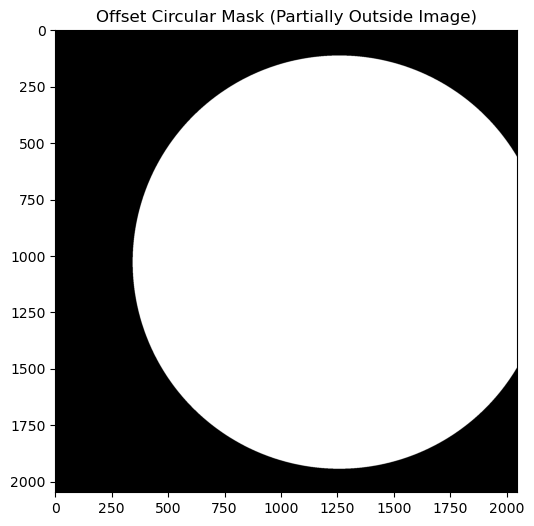

In [27]:
circ_mask = offset_circular_mask(img, best_region, best_area)

In [124]:
circ_mask[circ_mask].shape, circ_mask.shape[0] * circ_mask.shape[1]

((2554903,), 4194304)

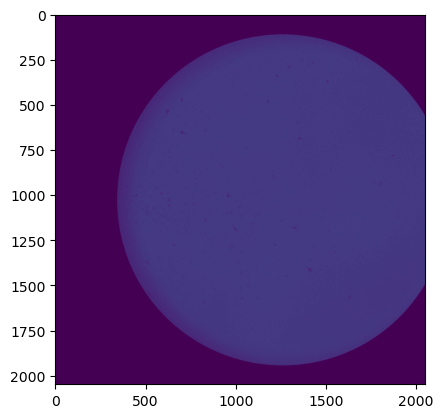

In [16]:
img[~circ_mask] = 0
plt.imshow(img)

In [71]:
def dummy_autofocus_0(files, circ_mask, method=None):
    # varlap = []
    sobel = []
    for f in files:
        img = io.imread(f).astype(np.int16)
        img[~circ_mask] = 0

        if method == 'equalize':
            img = exposure.equalize_hist(img)
        elif method == 'adapeq':
            img = exposure.equalize_adapthist(img)
        elif method == 'gauss':
            img = gaussian(img, sigma=1)
        elif method == 'median':
            img = median(img, disk(2))
        elif method == 'highpass':
            low_freq = uniform_filter(img, size=5)
            img = img - low_freq
        elif method == 'denoise':
            img = denoise_bilateral(img, )
        else: 
            pass
        sobel.append(sobel_focus(img))

    plt.plot(sobel, 'o-', label=method)
    plt.legend()

    return sobel

In [35]:
path = '/Users/pabloherrero/Library/CloudStorage/GoogleDrive-qmlab@mail.huji.ac.il/My Drive/Ba Tagging/code/imag_analisis/focustest/0.01mm, whitelight_attempt1/Im_pos*.tif'
files = glob(path)[200:]
files.sort()
# Empirically: Im_pos20570.0um

img0 = io.imread(files[0]).astype(np.int16)

_, best_area, best_region = find_fov(img0)
circ_mask = offset_circular_mask(img0, best_region, best_area, flag_plot=False)
    

Threshold otsu:  159


In [129]:
os.path.split(files[57])[1]

'Im_pos20420.0um.tif'

No handles with labels found to put in legend.


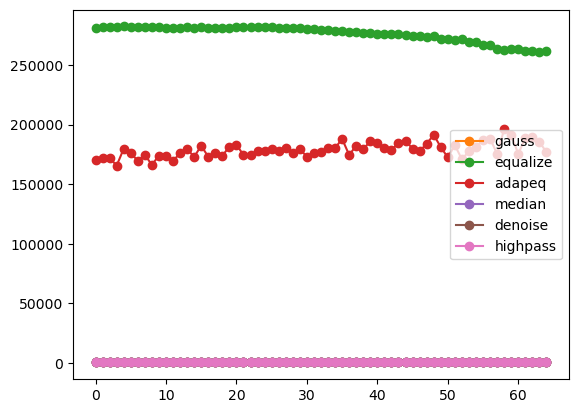

In [ ]:
sobel_0 = dummy_autofocus_0(files, circ_mask)
sobel_gauss = dummy_autofocus_0(files, circ_mask, method='gauss')
sobel_eq = dummy_autofocus_0(files, circ_mask, method='equalize')
sobel_adapeq = dummy_autofocus_0(files, circ_mask, method='adapeq')
sobel_median = dummy_autofocus_0(files, circ_mask, method='median')
sobel_denoise = dummy_autofocus_0(files, circ_mask, method='denoise')
sobel_highpass = dummy_autofocus_0(files, circ_mask, method='highpass')

In [44]:
def scale_sobel(sobel_m, sobel_0):
    sobel_offset =  sobel_m - np.min(sobel_m)
    sobel_0_offset = np.array(sobel_0) - np.min(sobel_0)
    factor_scale_m = np.max(sobel_offset) / np.max(sobel_0_offset)
    sobel_m_scale = sobel_offset / factor_scale_m
    return sobel_m_scale

In [72]:
sobel_0_offset = np.array(sobel_0) - np.min(sobel_0)

sobel_eq_scale = scale_sobel_eq(sobel_eq, sobel_0)
sobel_adapeq_scale = scale_sobel(sobel_adapeq, sobel_0)
sobel_highpass_scale = scale_sobel(sobel_highpass, sobel_0)
sobel_gauss_scale = scale_sobel(sobel_gauss, sobel_0)
sobel_median_scale = scale_sobel(sobel_median, sobel_0)
sobel_denoise_scale = scale_sobel(sobel_denoise, sobel_0)


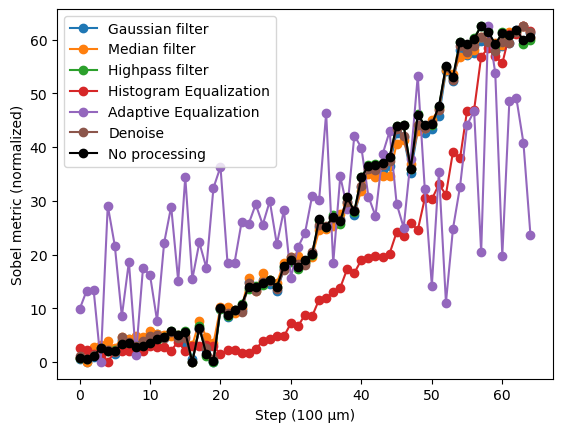

In [73]:
plt.plot(sobel_gauss_scale, 'o-', label='Gaussian filter')
plt.plot(sobel_median_scale, 'o-', label='Median filter')
plt.plot(sobel_highpass_scale, 'o-', label='Highpass filter')
plt.plot(sobel_eq_scale, 'o-', label='Histogram Equalization')
plt.plot(sobel_adapeq_scale, 'o-', label='Adaptive Equalization')
plt.plot(sobel_denoise_scale, 'o-', label='Denoise')
plt.plot(sobel_0_offset, 'ko-', label='No processing')
plt.gca().set(xlabel='Step (100 µm)', ylabel='Sobel metric (normalized)')
plt.legend()

### Apply equalization and repeat comparison:

In [ ]:
def dummy_autofocus(files, circ_mask, method=None):
    # varlap = []
    sobel = []
    for f in files:
        img = io.imread(f).astype(np.int16)
        img[~circ_mask] = 0

        img = exposure.equalize_hist(img)
        if method == 'gauss':
            img = gaussian(img, sigma=1)
        elif method == 'median':
            img = median(img, disk(2))
        elif method == 'highpass':
            low_freq = uniform_filter(img, size=5)
            img = img - low_freq
        elif method == 'denoise':
            img = denoise_bilateral(img, )
        sobel.append(sobel_focus(img))

    plt.plot(sobel, 'o-', label=method)
    plt.legend()

    return sobel

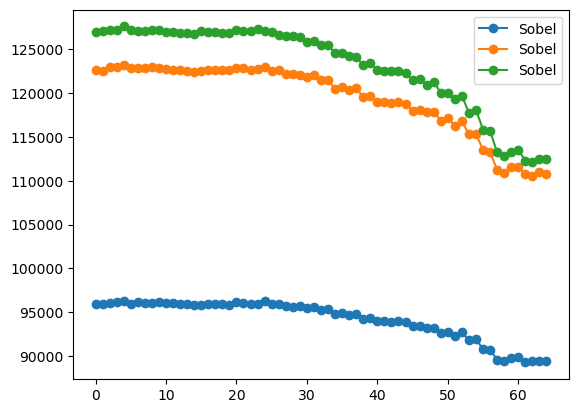

In [ ]:
sobel_eq_gauss = dummy_autofocus(files, circ_mask, method='gauss')
sobel_eq_median = dummy_autofocus(files, circ_mask, method='median')
sobel_eq_denoise = dummy_autofocus(files, circ_mask, method='denoise')
sobel_eq_highpass = dummy_autofocus(files, circ_mask, method='highpass')

In [30]:
def scale_sobel_eq(sobel_eq, sobel_0):
    sobel_eq_offset =  np.max(sobel_eq) - sobel_eq
    sobel_0_offset = np.array(sobel_0) - np.min(sobel_0)
    factor_scale_eq = np.max(sobel_eq_offset) / np.max(sobel_0_offset)
    sobel_eq_scale = sobel_eq_offset / factor_scale_eq
    return sobel_eq_scale

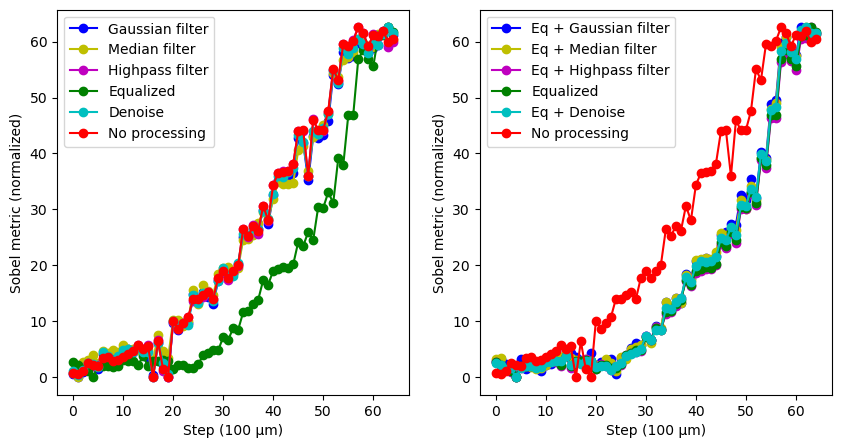

In [49]:
sobel_0_offset = np.array(sobel_0) - np.min(sobel_0)
sobel_eq_highpass_scale = scale_sobel_eq(sobel_eq_highpass, sobel_0)
sobel_eq_gauss_scale = scale_sobel_eq(sobel_eq_gauss, sobel_0)
sobel_eq_median_scale = scale_sobel_eq(sobel_eq_median, sobel_0)
sobel_eq_denoise_scale = scale_sobel_eq(sobel_eq_denoise, sobel_0)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].plot(sobel_gauss_scale, 'bo-', label='Gaussian filter')
ax[0].plot(sobel_median_scale, 'yo-', label='Median filter')
ax[0].plot(sobel_highpass_scale, 'mo-', label='Highpass filter')
ax[0].plot(sobel_eq_scale, 'go-', label='Equalized')
ax[0].plot(sobel_denoise_scale, 'co-', label='Denoise')
ax[0].plot(sobel_0_offset, 'ro-', label='No processing')
ax[0].set(xlabel='Step (100 µm)', ylabel='Sobel metric (normalized)')
ax[0].legend()

ax[1].plot(sobel_eq_gauss_scale, 'bo-', label='Eq + Gaussian filter')
ax[1].plot(sobel_eq_median_scale, 'yo-', label='Eq + Median filter')
ax[1].plot(sobel_eq_highpass_scale, 'mo-', label='Eq + Highpass filter')
ax[1].plot(sobel_eq_scale, 'go-', label='Equalized')
ax[1].plot(sobel_eq_denoise_scale, 'co-', label='Eq + Denoise')
ax[1].plot(sobel_0_offset, 'ro-', label='No processing')
ax[1].set(xlabel='Step (100 µm)', ylabel='Sobel metric (normalized)')

ax[1].legend()

## Compare focus metrics:

In [87]:
def dummy_autofocus_metric(files, circ_mask, method=None):
    metric = []
    for f in files:
        img = io.imread(f).astype(np.int16)
        img[~circ_mask] = 0

        img = exposure.equalize_hist(img)
        if method == 'varlap':
            metric.append(variance_of_laplacian(img))

        elif method == 'tenengrad':
            metric.append(tenengrad(img))
        elif method == 'laplacian':
            metric.append(laplacian(img))
        elif method == 'canny':
            metric.append(canny_sum(img))
        elif method == 'canny2':
            metric.append(canny2(img))
        else:
            metric.append(sobel_focus(img))
        

    plt.plot(metric, 'o-', label=method)
    plt.legend()

    return metric

No handles with labels found to put in legend.


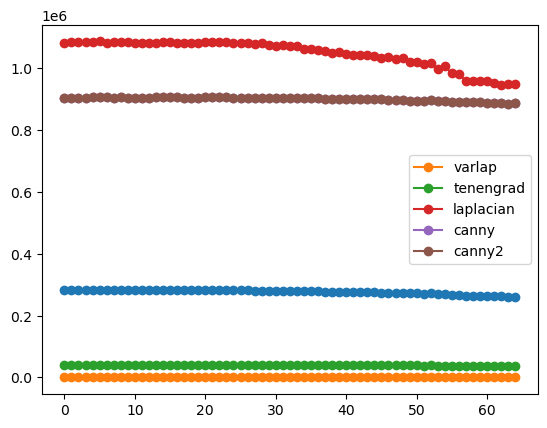

In [116]:
metric_sobel = dummy_autofocus_metric(files, circ_mask, method=None)
metric_varlap = dummy_autofocus_metric(files, circ_mask, method='varlap')
metric_tenengrad = dummy_autofocus_metric(files, circ_mask, method='tenengrad')
metric_laplacian = dummy_autofocus_metric(files, circ_mask, method='laplacian')
metric_canny = dummy_autofocus_metric(files, circ_mask, method='canny')
metric_canny2 = dummy_autofocus_metric(files, circ_mask, method='canny2')

In [104]:
metric_sobel_offset = np.array(metric_sobel) - np.min(metric_sobel)
sobel_scale = scale_sobel_eq(metric_sobel, metric_sobel)
varlap_scale = scale_sobel_eq(metric_varlap, metric_sobel)
tenengrad_scale = scale_sobel_eq(metric_tenengrad, metric_sobel)
laplacian_scale = scale_sobel_eq(metric_laplacian, metric_sobel)
canny_scale = scale_sobel_eq(metric_canny, metric_sobel)
canny2_scale = scale_sobel_eq(metric_canny2, metric_sobel)

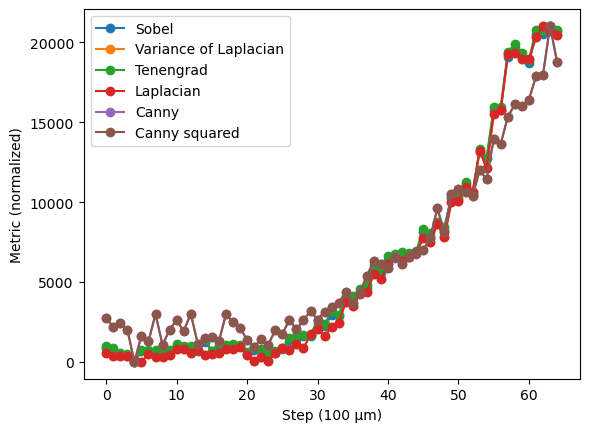

In [109]:
plt.plot(sobel_scale, 'o-', label='Sobel')
plt.plot(varlap_scale, 'o-', label='Variance of Laplacian')
plt.plot(tenengrad_scale, 'o-', label='Tenengrad') 
plt.plot(laplacian_scale, 'o-', label='Laplacian')
plt.plot(canny_scale, 'o-', label='Canny')
plt.plot(canny2_scale, 'o-', label='Canny squared')

plt.gca().set(xlabel='Step (100 µm)', ylabel='Metric (normalized)')
plt.legend()

# Final (dummy) algorithm

In [ ]:
def dummy_autofocus(files, flag_plot=False):
    metric = []

    # img0 = self.camera.get_frame()    # For live autofocus
    img0 = io.imread(files[0]).astype(np.int16)
    _, best_area, best_region = find_fov(img0)
    circ_mask = offset_circular_mask(img0, best_region, best_area, flag_plot=flag_plot)

    # for n in nsteps:
        # motor.move(n)
        # img = self.camera.get_frame()
    for f in files:
        img = io.imread(f).astype(np.int16) 
        img[~circ_mask] = 0
        img = exposure.equalize_hist(img)
        metric.append(laplacian(img))

    if flag_plot:
        plt.plot(metric, 'o-')
        plt.legend()

    # return np.argmin(metric), metric
    return metric